<a href="https://colab.research.google.com/github/SahasraKrishna/Book-Management/blob/master/MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Install extra packages if needed
!pip install nltk scikit-learn matplotlib seaborn xgboost

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
!pip install dask


In [50]:
# URL of the CSV file
url = "/content/complaints-2025-09-28_08_42.csv"  # Replace with actual CSV link

# Load CSV into pandas dataframe
df = pd.read_csv(url)

# Inspect the dataset
print(df.head())
print(df.info())



  Date received                    Product      Sub-product  \
0      07/24/25  Debt or credit management  Debt settlement   
1      09/13/16                Payday loan              NaN   
2      01/17/24  Debt or credit management  Debt settlement   
3      05/27/15                Payday loan              NaN   
4      12/17/15                Payday loan              NaN   

                                      Issue  Sub-issue  \
0       Unauthorized withdrawals or charges        NaN   
1  Charged fees or interest I didn't expect        NaN   
2          Didn't provide services promised        NaN   
3        Can't stop charges to bank account        NaN   
4        Can't stop charges to bank account        NaN   

                        Consumer complaint narrative  \
0                                                NaN   
1                                                NaN   
2  On XX/XX/XXXX XXXX XXXX  I made a debt settlem...   
3                                               

In [52]:
# To see all column names
print(df.columns.tolist())


['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


Dataset loaded successfully!
Available labels in dataset: [3 2]
Label distribution:
 label
3    4969
2     333
Name: count, dtype: int64
Logistic Regression Accuracy: 0.9538
Precision (macro): 0.9765
Recall (macro): 0.6343
F1-score (macro): 0.6997


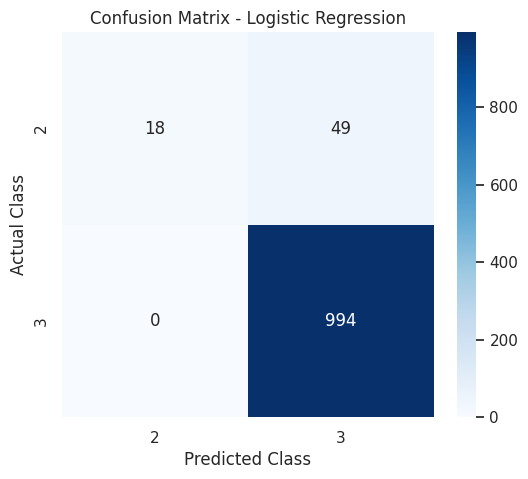


Classification Report:

              precision    recall  f1-score   support

           2       1.00      0.27      0.42        67
           3       0.95      1.00      0.98       994

    accuracy                           0.95      1061
   macro avg       0.98      0.63      0.70      1061
weighted avg       0.96      0.95      0.94      1061



In [56]:
# Step 1: Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset
file_path = "/content/complaints-2025-09-28_10_16.csv"  # Update with your CSV path
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
print("Dataset loaded successfully!")

# Step 3: Keep only rows with complaint text
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Map Product to numeric labels
category_map = {
    'Credit reporting, repair, or other': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}

# Filter dataset for only available categories
available_categories = [cat for cat in category_map.keys() if cat in df['Product'].unique()]
if not available_categories:
    raise ValueError("None of the desired categories are present in the dataset!")

df = df[df['Product'].isin(available_categories)]
df['label'] = df['Product'].map(category_map)

print("Available labels in dataset:", df['label'].unique())
print("Label distribution:\n", df['label'].value_counts())

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg_model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = logreg_model.predict(X_test)

# Step 9: Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Step 10: Confusion Matrix
unique_labels = sorted(df['label'].unique())
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Step 11: Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, labels=unique_labels, zero_division=0))


Dataset loaded successfully!
Mapped label distribution:
 label
3    133980
2      9461
1      3549
Name: count, dtype: int64

Logistic Regression Accuracy: 0.9735
Precision (macro): 0.9170
Recall (macro): 0.8024
F1-score (macro): 0.8518


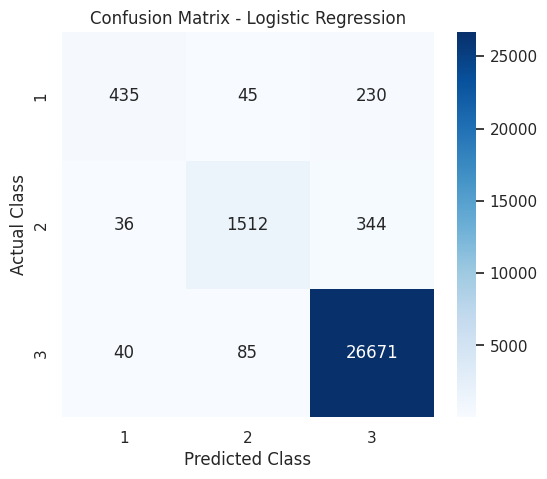


Classification Report:

              precision    recall  f1-score   support

           1       0.85      0.61      0.71       710
           2       0.92      0.80      0.86      1892
           3       0.98      1.00      0.99     26796

    accuracy                           0.97     29398
   macro avg       0.92      0.80      0.85     29398
weighted avg       0.97      0.97      0.97     29398



In [58]:
# Step 1: Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset
file_path = "/content/complaints-2025-09-28_10_16.csv"  # Update with your CSV path
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
print("Dataset loaded successfully!")

# Step 3: Keep only rows with complaint text
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Map existing Product values to desired labels
# Example mapping based on your dataset
label_map = {
    'Debt or credit management': 1,    # Map to Debt collection
    'Consumer Loan': 2,                # Map to Consumer Loan
    'Payday loan': 2,                   # Map to Consumer Loan
    'Mortgage': 3,                      # Map to Mortgage
    'Credit reporting, repair, or other': 0   # Map to Credit reporting, repair, or other
}

# Keep only rows that can be mapped
df = df[df['Product'].isin(label_map.keys())]
df['label'] = df['Product'].map(label_map)

print("Mapped label distribution:\n", df['label'].value_counts())

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg_model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = logreg_model.predict(X_test)

# Step 9: Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Step 10: Confusion Matrix
unique_labels = sorted(df['label'].unique())
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Step 11: Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, labels=unique_labels, zero_division=0))


In [25]:
# URL of the CSV file
url = "/content/complaints-2025-09-28_09_08.csv"  # Replace with actual CSV link

# Load CSV into pandas dataframe
df = pd.read_csv(url)

# Inspect the dataset
print(df.head())
print(df.info())



  Date received                    Product       Sub-product  \
0      07/24/25  Debt or credit management   Debt settlement   
1      11/12/16              Consumer Loan      Vehicle loan   
2      05/29/14              Consumer Loan      Vehicle loan   
3      01/07/13              Consumer Loan      Vehicle loan   
4      03/10/15              Consumer Loan  Installment loan   

                                 Issue  Sub-issue  \
0  Unauthorized withdrawals or charges        NaN   
1           Managing the loan or lease        NaN   
2         Taking out the loan or lease        NaN   
3  Problems when you are unable to pay        NaN   
4         Taking out the loan or lease        NaN   

  Consumer complaint narrative Company public response  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4     

Number of complaints with text: 5311
Available products: ['Debt or credit management' 'Payday loan' 'Virtual currency']
Vectorized text shape: (5311, 5000)
Classification Report:
                           precision    recall  f1-score   support

Debt or credit management       0.96      0.97      0.97       713
              Payday loan       0.94      0.93      0.93       347
         Virtual currency       1.00      0.33      0.50         3

                 accuracy                           0.95      1063
                macro avg       0.97      0.74      0.80      1063
             weighted avg       0.95      0.95      0.95      1063



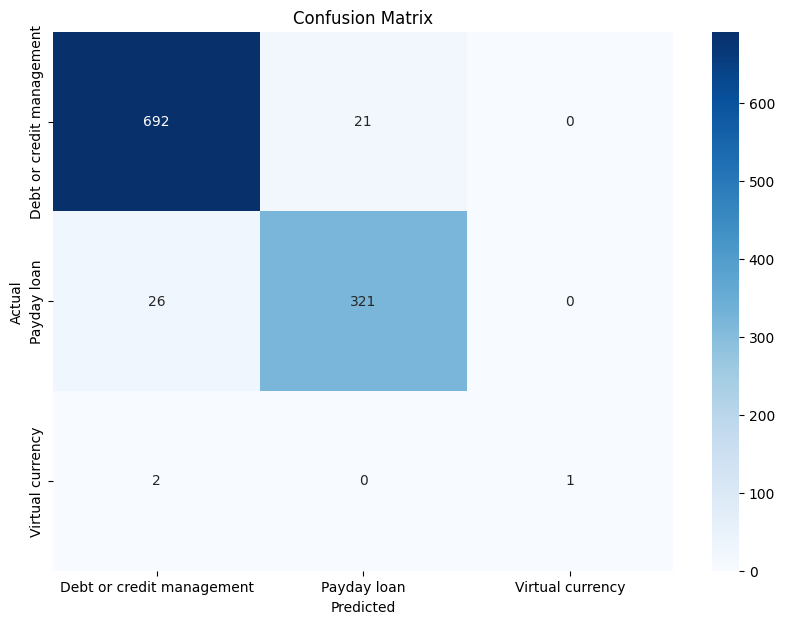

Predictions for new complaints:
'I am unable to get my credit score updated' → Debt or credit management
'My mortgage interest rate keeps increasing unexpectedly' → Debt or credit management
'Debt collector keeps calling me even after I paid' → Debt or credit management
'I applied for a personal loan but it got rejected unfairly' → Payday loan


In [53]:
# Step 0: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load CSV
file_path = "/content/complaints-2025-09-28_08_42.csv"
df = pd.read_csv(file_path)

# Step 2: Keep only non-empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]
print(f"Number of complaints with text: {len(df)}")

# Step 3: Check available products
print("Available products:", df['Product'].unique())

# Step 4: Map each product to a numeric label
products = df['Product'].unique()
product_map = {prod: idx for idx, prod in enumerate(products)}
df['label'] = df['Product'].map(product_map)

# Step 5: Vectorize complaint text
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']
print(f"Vectorized text shape: {X.shape}")

# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Step 8: Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=products))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=products, yticklabels=products)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Predict on new complaints
new_complaints = [
    "I am unable to get my credit score updated",
    "My mortgage interest rate keeps increasing unexpectedly",
    "Debt collector keeps calling me even after I paid",
    "I applied for a personal loan but it got rejected unfairly"
]

new_X = vectorizer.transform(new_complaints)
new_preds = model.predict(new_X)
predicted_labels = [products[i] for i in new_preds]

print("Predictions for new complaints:")
for text, label in zip(new_complaints, predicted_labels):
    print(f"'{text}' → {label}")


In [27]:
# Step 0: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')  # suppress warnings

# Step 1: Load CSV
file_path = "/content/complaints-2025-09-28_08_42.csv"
df = pd.read_csv(file_path)

# Step 2: Keep only non-empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]
print(f"Number of complaints with text: {len(df)}")

# Step 3: Map product categories to numeric labels
products = df['Product'].unique()
product_map = {prod: idx for idx, prod in enumerate(products)}
df['label'] = df['Product'].map(product_map)

# Step 4: Vectorize text
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']
print(f"Vectorized text shape: {X.shape}")

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# Step 7: Train, predict, and evaluate all models
results = {}
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=products))

# Step 8: Compare accuracies
print("\n--- Model Accuracy Comparison ---")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Number of complaints with text: 5311
Vectorized text shape: (5311, 5000)

--- Logistic Regression ---
Accuracy: 0.9539
Classification Report:
                           precision    recall  f1-score   support

Debt or credit management       0.96      0.97      0.97       713
              Payday loan       0.94      0.93      0.93       347
         Virtual currency       1.00      0.33      0.50         3

                 accuracy                           0.95      1063
                macro avg       0.97      0.74      0.80      1063
             weighted avg       0.95      0.95      0.95      1063


--- SVM (Linear Kernel) ---
Accuracy: 0.9445
Classification Report:
                           precision    recall  f1-score   support

Debt or credit management       0.96      0.96      0.96       713
              Payday loan       0.91      0.93      0.92       347
         Virtual currency       0.50      0.33      0.40         3

                 accuracy                      

Number of complaints with text: 5311
Vectorized text shape: (5311, 5000)

--- Logistic Regression ---
Accuracy: 0.9539
Classification Report:
                           precision    recall  f1-score   support

Debt or credit management       0.96      0.97      0.97       713
              Payday loan       0.94      0.93      0.93       347
         Virtual currency       1.00      0.33      0.50         3

                 accuracy                           0.95      1063
                macro avg       0.97      0.74      0.80      1063
             weighted avg       0.95      0.95      0.95      1063



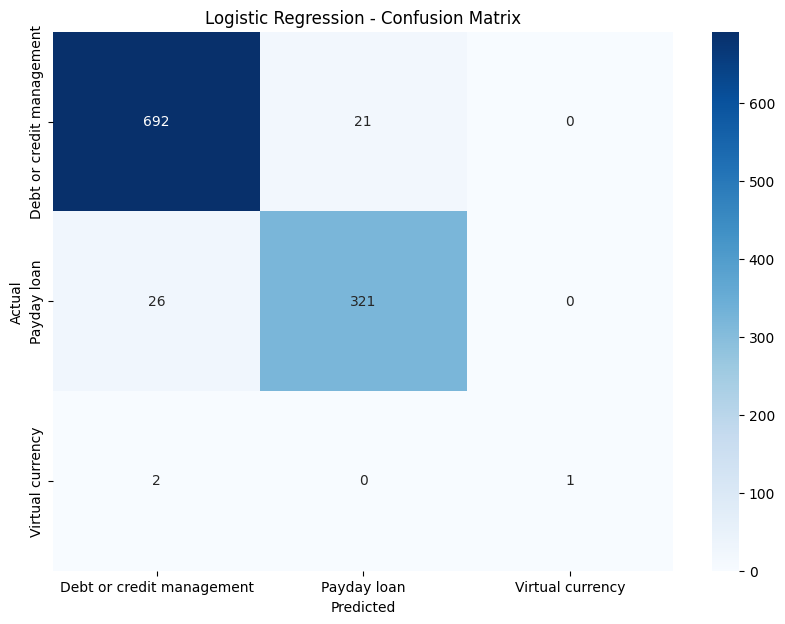


--- SVM (Linear Kernel) ---
Accuracy: 0.9445
Classification Report:
                           precision    recall  f1-score   support

Debt or credit management       0.96      0.96      0.96       713
              Payday loan       0.91      0.93      0.92       347
         Virtual currency       0.50      0.33      0.40         3

                 accuracy                           0.94      1063
                macro avg       0.79      0.74      0.76      1063
             weighted avg       0.94      0.94      0.94      1063



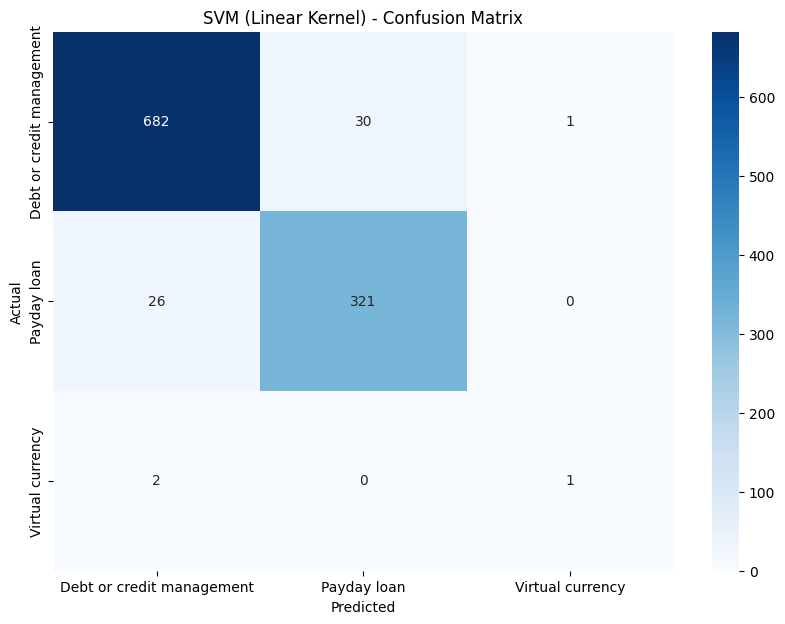


--- Random Forest ---
Accuracy: 0.9577
Classification Report:
                           precision    recall  f1-score   support

Debt or credit management       0.95      0.99      0.97       713
              Payday loan       0.97      0.90      0.94       347
         Virtual currency       1.00      0.33      0.50         3

                 accuracy                           0.96      1063
                macro avg       0.98      0.74      0.80      1063
             weighted avg       0.96      0.96      0.96      1063



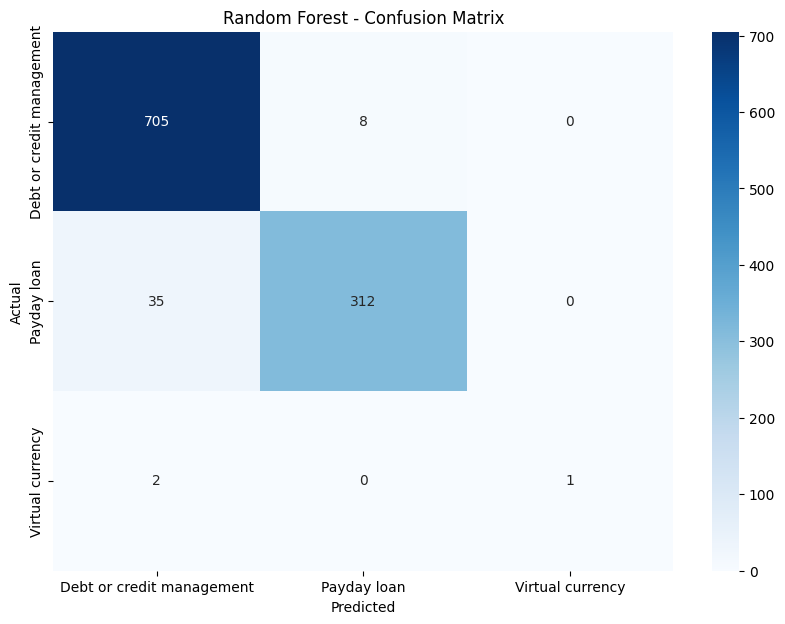

In [28]:
# Step 0: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load CSV
file_path = "/content/complaints-2025-09-28_08_42.csv"
df = pd.read_csv(file_path)

# Step 2: Keep only non-empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]
print(f"Number of complaints with text: {len(df)}")

# Step 3: Map product categories to numeric labels
products = df['Product'].unique()
product_map = {prod: idx for idx, prod in enumerate(products)}
df['label'] = df['Product'].map(product_map)

# Step 4: Vectorize text using CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']
print(f"Vectorized text shape: {X.shape}")

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# Step 7: Train, predict, evaluate, and plot confusion matrices
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy and classification report
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=products))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=products, yticklabels=products)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


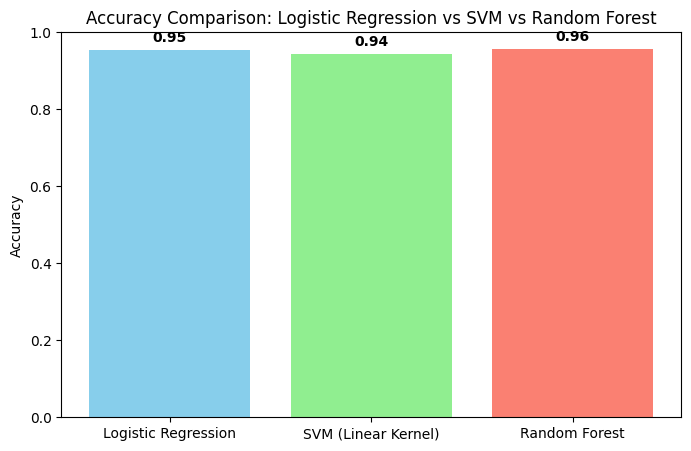

In [29]:
# Step 0: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load CSV
file_path = "/content/complaints-2025-09-28_08_42.csv"
df = pd.read_csv(file_path)

# Step 2: Keep only non-empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 3: Map product categories to numeric labels
products = df['Product'].unique()
product_map = {prod: idx for idx, prod in enumerate(products)}
df['label'] = df['Product'].map(product_map)

# Step 4: Vectorize text
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train models and record accuracies
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Step 7: Plot comparison bar chart
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Logistic Regression vs SVM vs Random Forest')
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [31]:
# URL of the CSV file
url = "/content/complaints-2025-09-28_08_42.csv"  # Replace with actual CSV link

# Load CSV into pandas dataframe
df = pd.read_csv(url)

# Inspect the dataset
print(df.head())
print(df.info())



  Date received                    Product      Sub-product  \
0      07/24/25  Debt or credit management  Debt settlement   
1      09/13/16                Payday loan              NaN   
2      01/17/24  Debt or credit management  Debt settlement   
3      05/27/15                Payday loan              NaN   
4      12/17/15                Payday loan              NaN   

                                      Issue  Sub-issue  \
0       Unauthorized withdrawals or charges        NaN   
1  Charged fees or interest I didn't expect        NaN   
2          Didn't provide services promised        NaN   
3        Can't stop charges to bank account        NaN   
4        Can't stop charges to bank account        NaN   

                        Consumer complaint narrative  \
0                                                NaN   
1                                                NaN   
2  On XX/XX/XXXX XXXX XXXX  I made a debt settlem...   
3                                               

In [32]:
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]
print(f"Number of complaints with text: {len(df)}")


Number of complaints with text: 5311


In [33]:
products = df['Product'].unique()
product_map = {prod: idx for idx, prod in enumerate(products)}
df['label'] = df['Product'].map(product_map)
print("Available categories:", products)


Available categories: ['Debt or credit management' 'Payday loan' 'Virtual currency']


In [34]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']
print(f"Vectorized text shape: {X.shape}")


Vectorized text shape: (5311, 5000)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    # "SVM (Linear Kernel)": SVC(kernel='linear'),
    # "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}


In [37]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracies[name]:.4f}")


Logistic Regression Accuracy: 0.9539


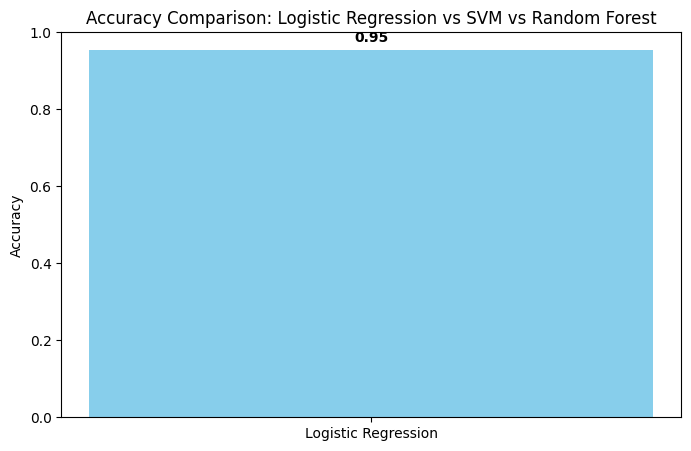

In [38]:
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Logistic Regression vs SVM vs Random Forest')

# Annotate bars with accuracy
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


In [39]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']
print(f"TF-IDF vectorized text shape: {X.shape}")


TF-IDF vectorized text shape: (5311, 5000)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]
print(f"Number of complaints with text: {len(df)}")


Number of complaints with text: 5311


In [43]:
products = df['Product'].unique()
product_map = {prod: idx for idx, prod in enumerate(products)}
df['label'] = df['Product'].map(product_map)
print("Available categories:", products)


Available categories: ['Debt or credit management' 'Payday loan' 'Virtual currency']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}


In [48]:
metrics_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    metrics_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')


In [49]:
metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']]
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.950141   0.638147  0.622581  0.629338
1  SVM (Linear Kernel)  0.951082   0.968993  0.736157  0.796520
2        Random Forest  0.945437   0.967977  0.728914  0.791759


In [41]:
file_path = "/content/complaints-2025-09-28_08_42.csv"
df = pd.read_csv(file_path)
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/24/25,Debt or credit management,Debt settlement,Unauthorized withdrawals or charges,NaN,NaN,NaN,"Clarity Debt Resolution, Inc",TX,76063,NaN,NaN,Web,08/01/25,Closed with explanation,Yes,NaN,14856720
1,09/13/16,Payday loan,NaN,Charged fees or interest I didn't expect,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,FL,33026,Older American,Consent not provided,Web,09/15/16,Closed with explanation,Yes,No,2110195
2,01/17/24,Debt or credit management,Debt settlement,Didn't provide services promised,NaN,On XX/XX/XXXX XXXX XXXX I made a debt settlem...,Company believes the complaint is the result o...,"Elite Financial Services, Inc (MA)",NY,132XX,NaN,Consent provided,Web,01/17/24,Closed with explanation,No,NaN,8165486
3,05/27/15,Payday loan,NaN,Can't stop charges to bank account,NaN,NaN,Company believes it acted appropriately as aut...,"CASHCALL, INC.",VA,23231,NaN,Consent not provided,Web,06/01/15,Closed with explanation,Yes,Yes,1393091
4,12/17/15,Payday loan,NaN,Can't stop charges to bank account,NaN,"On Wednesday, XXXX XXXX, 2015, I agreed to a s...",Company believes the complaint is the result o...,"ENOVA INTERNATIONAL, INC.",TX,75237,NaN,Consent provided,Web,12/17/15,Closed with explanation,Yes,No,1699504
